Import statements

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

### Importing the dataset 
<p><b> Important parameters: </b><br> 
    Number of instances: 302  <br>
    Number of attributes: 14 continuous attributes  </p>
<b> Each of the attributes: </b><br>      
    age: Age in years  <br>  
        -continuous  <br>
    sex: (1= male, 0= female) <br>  
        - nominal <br>
    cp: Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value3: non-aginal pain, Value 4: asymptomatic)<br>
        - ordinal<br>
        - 1->3->2->4<br>
    trestbps: Resting blood pressure (in mmHg on admission to the hospital)  <br>
        -continuous<br>
    chol: Serum Cholestoral in mg/dl  <br>
        -continuous<br>
    fbs: fast blood sugar > 120 mg/dl (1= true, 0=false)  <br>
        -nominal<br>
    restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or St elevation or depression of > 0.05mV, 2: showing probabal or definite left ventricular hypertrophy by Estes'criteria)  <br>
        -ordinal <br>
    thalach: Maximum heart rate achieved<br>
        -continuous<br>
    exang: Excercise included angina (1= yes, 0=no)<br>
     - nominal <br>  
    oldpeak: ST depression indced by exercise relative to rest <br> 
    -continuous <br> 
    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) <br> 
    -ordinal <br>
    ca : Number of major vessels (0-3) colored by flourosopy <br>
    -reverse ordinal <br> 
    thal(Thallium Stress Test Results): 3= normal, 6= fixed defect, 7= reversable defect<br>
        -ordinal <br>
    HeartDisease: Diagnosis of heart disease- angiprahic disease status (Value 0: <50% diameter narrowing, Value 1: > 50% diameter narrowing) in any major vessel: attributes 59 through 68 are vessels  


In [37]:
HDNames= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','HeartDisease']
data = pd.read_excel('Ch3.ClevelandData.xlsx', names=HDNames)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


Analysing the raw data   
only - age , trestbps , chol , thalach and oldpeak are continoud values rest all are categorical values 
(we don't scale categorical data)


In [38]:
data = data.replace('?', np.nan)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            298 non-null    float64
 12  thal          300 non-null    float64
 13  HeartDisease  302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  30

C:\Users\asmit\AppData\Local\Temp\ipykernel_12044\541714277.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('?', np.nan)


Removing null values and counting total positive and negative cases

In [39]:
print(data.isnull().sum())
dataNew = data.dropna()
print(dataNew.info())
heart_disease_counts = dataNew['HeartDisease'].value_counts()
print(heart_disease_counts)

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
thal            2
HeartDisease    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   trestbps      296 non-null    int64  
 4   chol          296 non-null    int64  
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null  

Visualizing the raw data

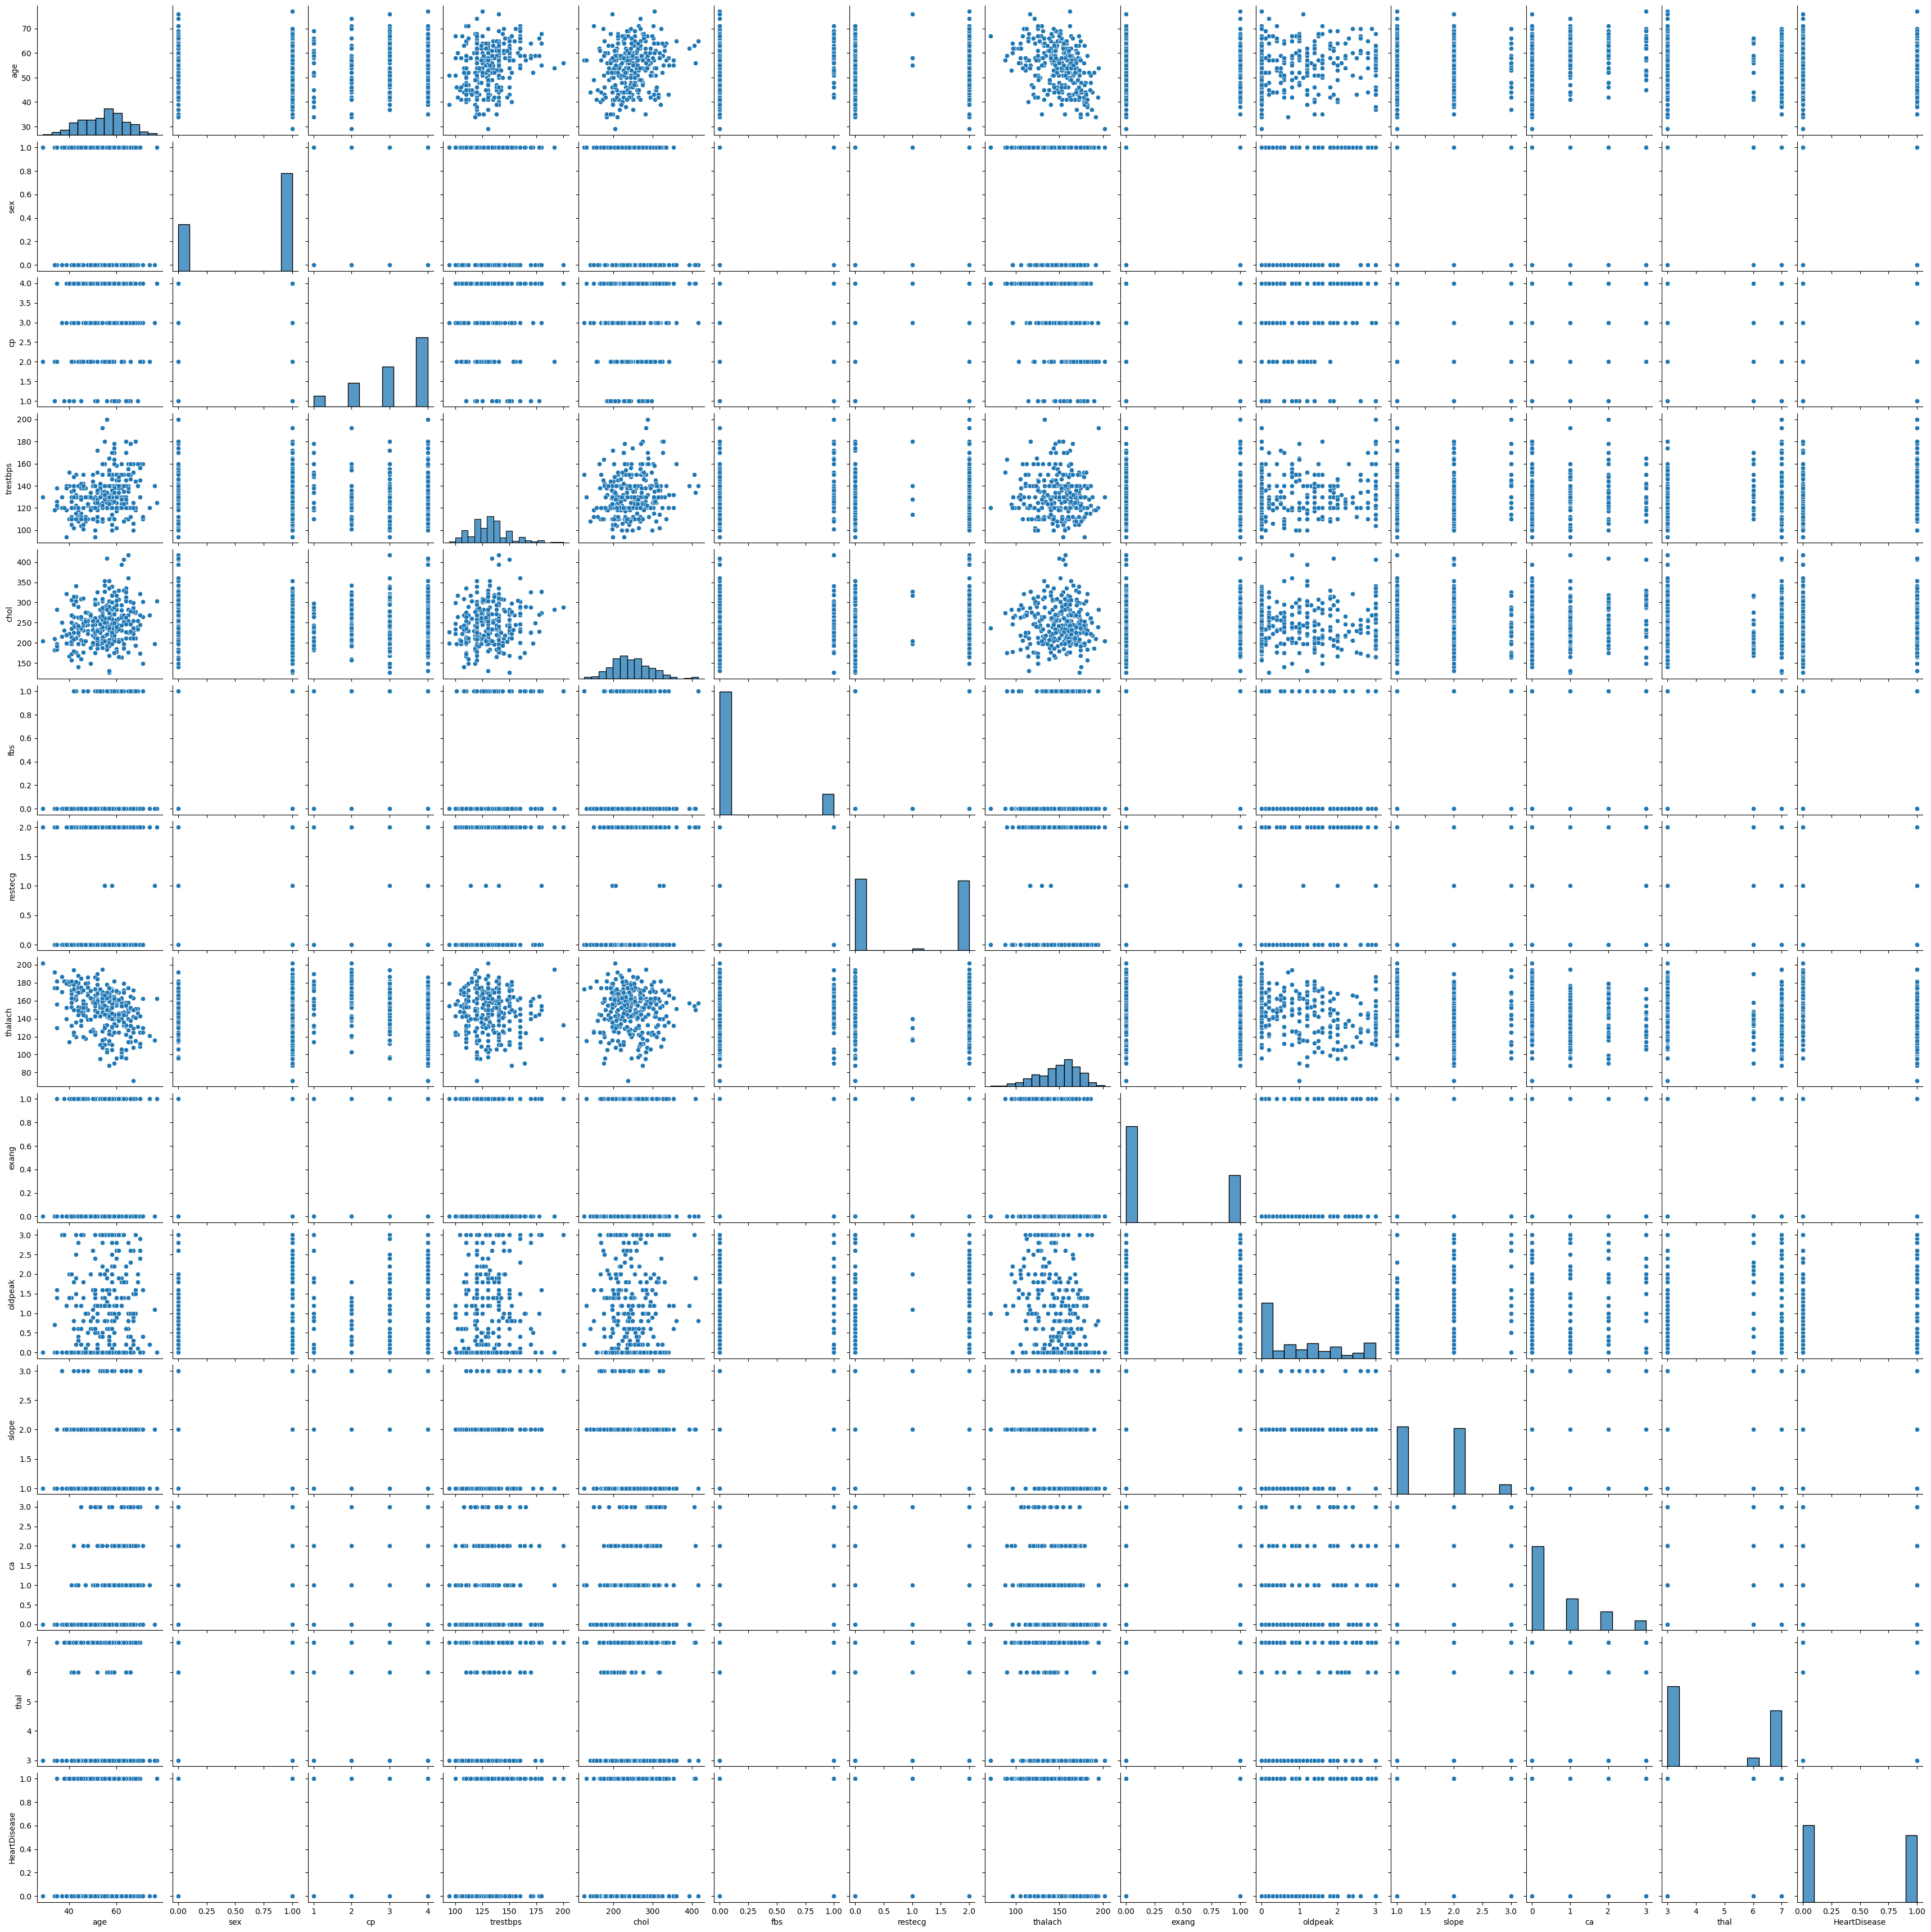

In [42]:
import seaborn as sns

# Create a pairplot of the dataset
sns.pairplot(dataNew)
plt.show()

we can infer from the plot that oldpeak has some outliars we will clip those and we will remove one outliar in cholestrol>500 

In [41]:
# Clip oldpeak values at 3
dataNew.loc[:, 'oldpeak'] = dataNew['oldpeak'].clip(upper=3)

# Remove the row with chol greater than 500
dataNew = dataNew[dataNew['chol'] <= 500]

# Display the updated dataframe
print(dataNew.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  295.000000  295.000000  295.000000  295.000000  295.000000  295.000000   
mean    54.471186    0.677966    3.166102  131.705085  246.325424    0.142373   
std      9.037621    0.468050    0.959842   17.779578   48.778507    0.350026   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.500000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  417.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  295.000000  295.000000  295.000000  295.000000  295.000000  295.000000   
mean     0.989831  149.562712    0.328814    0.988475    1.596610    0.681356   
std      0.994833   23.0114

### Preprocessing the data
hotencoding = sex , fbs , exang     
labelencoding = cp, resteng, cp, thal,slope - as it is     
continous = age , trestbps, chol, thalach, oldpeak - scalar   

In [50]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
nominal_features=['sex','fbs','exang']
ordinal_features=['cp','restecg','slope','ca','thal']
target=['HeartDisease']

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),  # Normalize numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)  # One-hot encode categorical features
], remainder='passthrough')

transformed_data = preprocessor.fit_transform(dataNew)
# print(transformed_data)

new_feature_names = (numerical_features + 
                     preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_features).tolist() + 
                     ordinal_features+target)  # Add transformed feature names

data_transformed = pd.DataFrame(transformed_data, columns=new_feature_names)

print(data_transformed.head())
print(data_transformed.describe())


        age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  fbs_0  \
0  0.791667  0.622642  0.549828  0.282443  0.500000    0.0    1.0    1.0   
1  0.791667  0.245283  0.353952  0.442748  0.866667    0.0    1.0    1.0   
2  0.166667  0.339623  0.426117  0.885496  1.000000    0.0    1.0    1.0   
3  0.250000  0.339623  0.268041  0.770992  0.466667    1.0    0.0    1.0   
4  0.562500  0.245283  0.378007  0.816794  0.266667    0.0    1.0    1.0   

   fbs_1  exang_0  exang_1   cp  restecg  slope   ca  thal  HeartDisease  
0    0.0      0.0      1.0  4.0      2.0    2.0  3.0   3.0           1.0  
1    0.0      0.0      1.0  4.0      2.0    2.0  2.0   7.0           1.0  
2    0.0      1.0      0.0  3.0      0.0    3.0  0.0   3.0           0.0  
3    0.0      1.0      0.0  2.0      2.0    1.0  0.0   3.0           0.0  
4    0.0      1.0      0.0  2.0      0.0    1.0  0.0   3.0           0.0  
              age    trestbps        chol     thalach     oldpeak       sex_0  \
count  295.0

Training the model

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


X = data_transformed.drop(columns=target)
y = data_transformed['HeartDisease']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.85
